In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [36]:
dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
dataframe

,CLASS,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,...,ADJ_VERB_,ADJ_ADV_,VERB_NOUN_,VERB_ADJ_,VERB_VERB_,VERB_ADV_,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_
0,entailment,28.645093,1.631951,9.032564,0.000000,6.144412,0.127508,0.000000,0.00000,4.677207,...,0.000000,0.000000,0.272727,0.045455,0.045455,0.000000,0.000000,0.0,0.000000,0.0
1,entailment,26.671300,3.984223,4.437697,0.000000,2.492923,8.615627,0.000000,0.00000,9.887845,...,0.000000,0.000000,0.476190,0.000000,0.095238,0.000000,0.000000,0.0,0.000000,0.0
2,contradiction,14.880619,1.824592,3.687874,0.000000,5.383794,1.300978,3.665578,0.00000,1.199861,...,0.111111,0.000000,0.055556,0.055556,0.055556,0.000000,0.000000,0.0,0.000000,0.0
3,contradiction,7.112267,0.000000,4.998954,0.000000,3.913144,0.000000,0.000000,0.00000,4.153236,...,0.000000,0.000000,0.120000,0.000000,0.320000,0.000000,0.000000,0.0,0.000000,0.0
4,neutral,14.623623,0.000000,1.083491,0.000000,1.657801,0.000000,0.000000,0.00000,3.077783,...,0.000000,0.000000,0.250000,0.000000,0.166667,0.000000,0.166667,0.0,0.083333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,entailment,22.531673,4.194771,1.396518,1.896350,0.000000,5.424360,1.283683,0.00000,3.104924,...,0.105263,0.000000,0.210526,0.052632,0.105263,0.052632,0.000000,0.0,0.000000,0.0
96,entailment,11.299096,0.000000,0.397504,0.000000,5.716955,0.000000,0.512868,0.00000,0.000000,...,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.0,0.000000,0.0
97,contradiction,6.672148,0.000000,5.138863,0.000000,0.000000,0.000000,0.000000,0.00000,3.334945,...,0.000000,0.000000,0.400000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.0
98,contradiction,7.110450,0.000000,0.658881,0.000000,0.000000,0.000000,0.000000,0.00000,2.450452,...,0.000000,0.000000,0.125000,0.000000,0.375000,0.000000,0.000000,0.0,0.000000,0.0


In [67]:
dataframe.corr()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADJ_VERB_,ADJ_ADV_,VERB_NOUN_,VERB_ADJ_,VERB_VERB_,VERB_ADV_,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_
NOUN_NOUN,1.000000,0.473417,0.518160,-0.184570,0.569911,0.348897,0.186067,-0.058467,0.506395,0.238874,...,-0.004243,-0.129969,0.225317,0.107224,-0.216224,-0.213308,0.175392,0.130731,0.107033,-0.076367
NOUN_ADJ,0.473417,1.000000,0.258314,-0.106220,0.562182,0.820611,0.292404,-0.008298,0.349788,0.651177,...,0.102057,-0.046615,0.133933,0.365426,-0.060937,-0.059810,0.381331,0.451266,0.268766,0.036915
NOUN_VERB,0.518160,0.258314,1.000000,-0.010653,0.454342,0.189316,0.370467,0.109714,0.542012,0.259439,...,0.142973,0.022981,0.206227,0.009906,0.015434,-0.184798,0.048462,-0.027227,0.004422,-0.113479
NOUN_ADV,-0.184570,-0.106220,-0.010653,1.000000,0.064331,0.014137,0.056709,0.650233,-0.153588,-0.119590,...,0.148722,0.662894,-0.148822,-0.135987,-0.049433,0.687664,-0.120052,-0.081471,0.001637,0.287123
ADJ_NOUN,0.569911,0.562182,0.454342,0.064331,1.000000,0.614653,0.569647,0.314157,0.260862,0.398584,...,0.402574,0.231317,-0.004283,0.069234,0.002873,-0.050457,0.170890,0.194392,0.151551,0.022931
ADJ_ADJ,0.348897,0.820611,0.189316,0.014137,0.614653,1.000000,0.359336,0.156094,0.281397,0.479392,...,0.248659,0.147376,0.131975,0.202974,-0.021165,0.011407,0.222753,0.259091,0.160529,0.007880
ADJ_VERB,0.186067,0.292404,0.370467,0.056709,0.569647,0.359336,1.000000,0.246774,0.133389,0.268380,...,0.771742,0.137047,-0.036388,0.014186,0.083153,-0.056036,0.013018,0.011493,-0.021539,-0.046418
ADJ_ADV,-0.058467,-0.008298,0.109714,0.650233,0.314157,0.156094,0.246774,1.000000,-0.105424,-0.094203,...,0.406390,0.789612,-0.116676,-0.107767,0.054216,0.273068,-0.073382,-0.049799,-0.048691,-0.002539
VERB_NOUN,0.506395,0.349788,0.542012,-0.153588,0.260862,0.281397,0.133389,-0.105424,1.000000,0.464402,...,-0.087226,-0.133518,0.775543,0.243788,0.178773,-0.062111,0.370509,0.199905,0.267614,-0.038467
VERB_ADJ,0.238874,0.651177,0.259439,-0.119590,0.398584,0.479392,0.268380,-0.094203,0.464402,1.000000,...,-0.053972,-0.123751,0.255054,0.619030,0.010555,-0.035800,0.549893,0.514978,0.370959,0.058675


In [37]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADJ_VERB_,ADJ_ADV_,VERB_NOUN_,VERB_ADJ_,VERB_VERB_,VERB_ADV_,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.000084,1.966909,3.329762,0.714661,4.027800,1.670292,0.708723,0.286763,3.231024,0.323173,...,0.055594,0.010530,0.148398,0.023537,0.167638,0.019728,0.018579,0.007551,0.014059,0.006380
std,13.066107,3.663051,3.705304,1.865683,5.916808,3.708663,1.476073,1.224743,3.755477,0.811359,...,0.090044,0.034234,0.129178,0.051654,0.123272,0.052443,0.059880,0.035864,0.058815,0.049246
min,0.916115,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.314418,0.000000,0.325808,0.000000,0.000000,0.000000,0.000000,0.000000,1.096962,0.000000,...,0.000000,0.000000,0.063889,0.000000,0.081731,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.530209,0.000000,2.048562,0.000000,2.046613,0.000000,0.000000,0.000000,2.370600,0.000000,...,0.000000,0.000000,0.125000,0.000000,0.139610,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.358584,2.639672,5.007361,0.000000,5.493229,0.862745,0.984578,0.000000,3.736365,0.000000,...,0.086890,0.000000,0.219618,0.000000,0.225490,0.000000,0.000000,0.000000,0.000000,0.000000
max,72.258190,19.695068,19.075915,8.491863,35.697347,20.094136,8.336549,9.572460,20.975957,5.915599,...,0.416667,0.200000,0.611111,0.285714,0.600000,0.318182,0.411765,0.294118,0.529412,0.461538


In [38]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


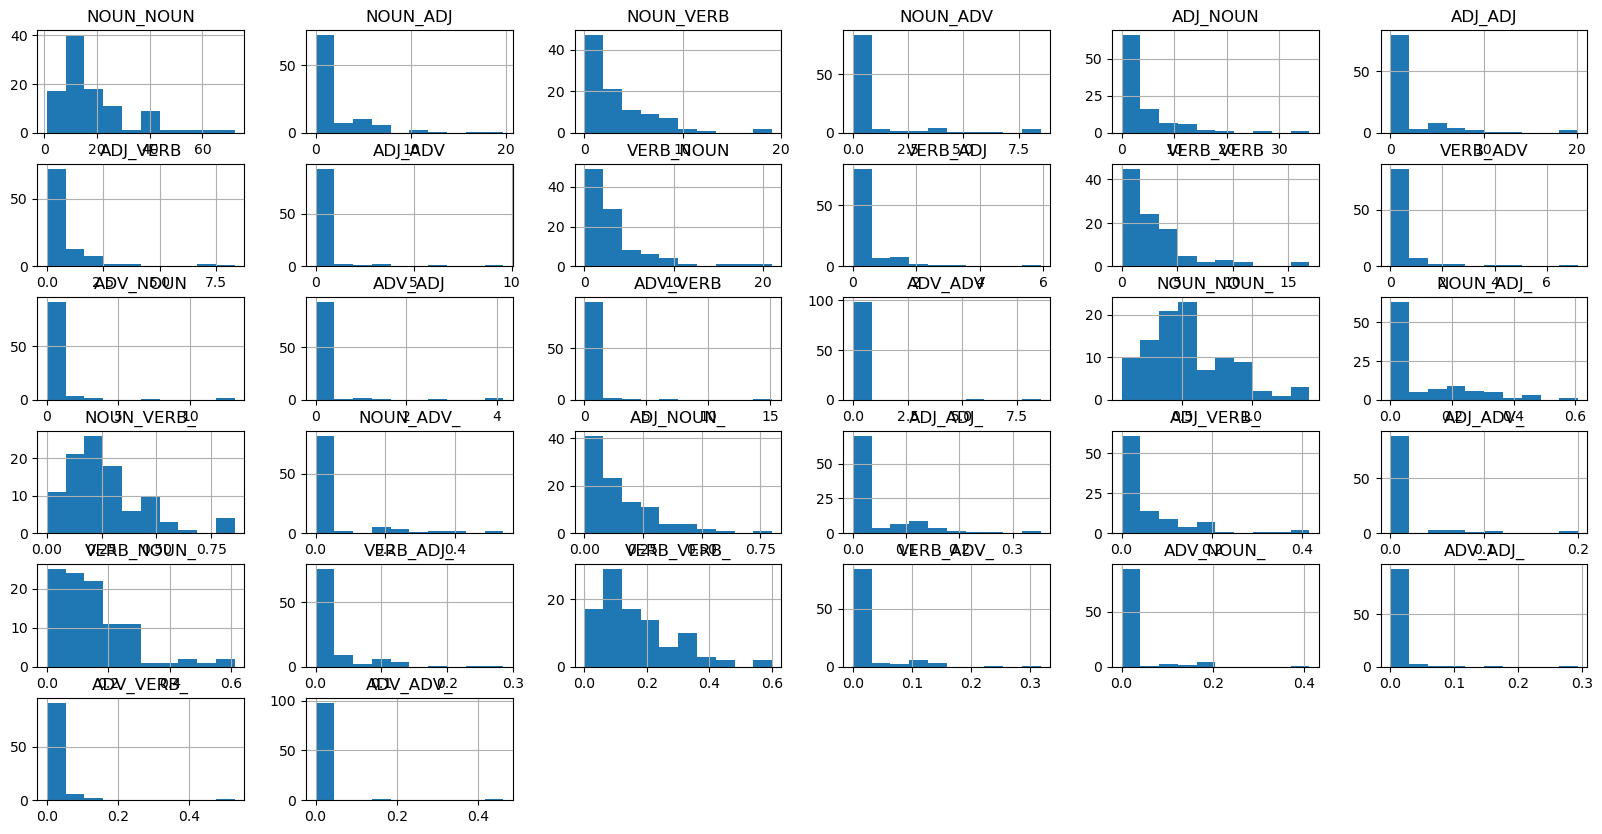

In [39]:
dataframe.hist(figsize=(20,10))
plt.show()

In [40]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [41]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [42]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

(100, 32)

In [43]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [44]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [45]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [46]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
model.decision_function(X)

array([[ 3.86012100e-01,  1.61028343e-01, -5.47040444e-01],
       [-9.78824971e-01,  6.07476166e-01,  3.71348806e-01],
       [-7.90601910e-01,  7.43574752e-01,  4.70271584e-02],
       [ 1.87819000e-01,  2.99787011e-01, -4.87606011e-01],
       [ 6.34427681e-02,  2.16758348e-01, -2.80201116e-01],
       [ 4.99958774e-01,  4.74833358e-01, -9.74792131e-01],
       [ 4.73673128e-02,  1.95215802e-01, -2.42583115e-01],
       [-3.99854025e-01,  7.96431240e-01, -3.96577215e-01],
       [-2.55790709e-01, -4.23612818e-01,  6.79403528e-01],
       [ 1.36228853e-02,  8.26385717e-01, -8.40008602e-01],
       [-1.23334354e+00,  5.13752341e-01,  7.19591197e-01],
       [-1.08809447e-01,  4.21983817e-01, -3.13174370e-01],
       [-6.06553833e-01,  5.33348400e-01,  7.32054328e-02],
       [ 5.69733405e-01,  6.56953928e-01, -1.22668733e+00],
       [-1.05887307e+00, -2.30036273e-01,  1.28890934e+00],
       [-2.77869412e-02,  2.24135129e-01, -1.96348188e-01],
       [-1.35589926e+00,  1.85887972e+00

In [48]:
labels=dataframe.columns[1:]

In [49]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [50]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [51]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  9 VERB_ADJ 6 ADJ_VERB
Entailment  7 ADJ_ADV 18 NOUN_VERB_
Neutral  1 NOUN_ADJ 3 NOUN_ADV


In [52]:
n_columns=dataframe.shape[1]-1

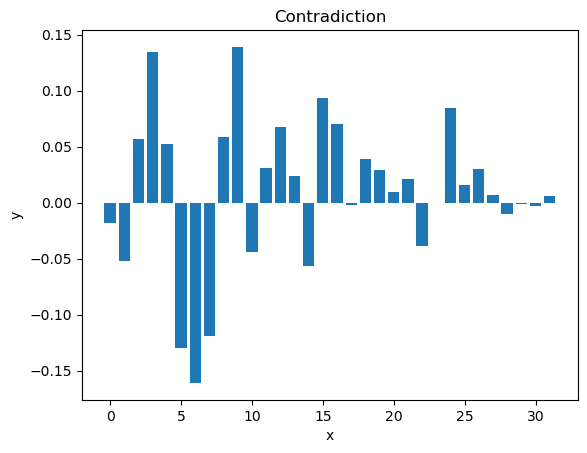

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

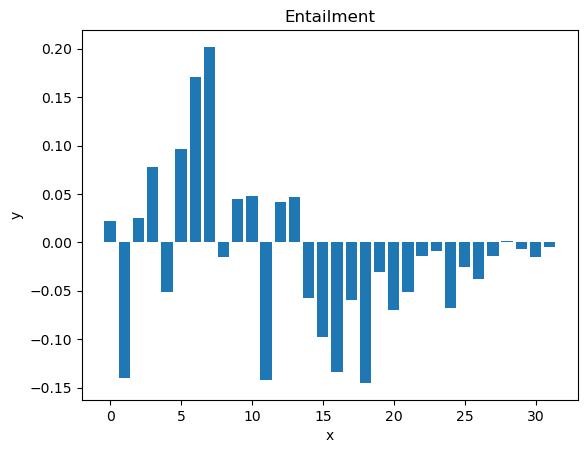

In [54]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

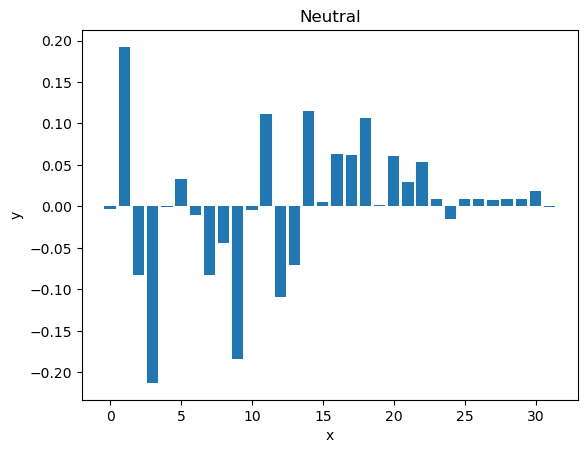

In [55]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [56]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'neutral' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'contradiction' 'entailment' 'contradiction' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'contradiction' 'entailment' 'neutral'
 'entailment' 'entailment' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'contradiction' 'neutral' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'neutral' 'entailment' 'entailment' 'entailment' 'contradiction'
 'neutral' 'neutral' 'neutral' 'entailment' 'e

In [57]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [58]:
X

array([[28.64509261,  1.63195105,  9.03256369, ...,  0.        ,
         0.        ,  0.        ],
       [26.67130001,  3.98422295,  4.43769664, ...,  0.        ,
         0.        ,  0.        ],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 6.67214802,  0.        ,  5.13886273, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.11044979,  0.        ,  0.6588807 , ...,  0.        ,
         0.        ,  0.        ],
       [13.31903434,  0.        ,  0.19219354, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
model.score(X,y)

0.58

In [60]:
print(confusion_matrix(y, predictions))

[[ 8 16  3]
 [ 4 35  3]
 [ 2 14 15]]


In [61]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [62]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression: 0.375000 (0.230489)


/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [63]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.65


In [64]:
print(confusion_matrix(Y_validation, predictions))

[[0 3 1]
 [1 9 0]
 [0 2 4]]


In [65]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         4
   entailment       0.64      0.90      0.75        10
      neutral       0.80      0.67      0.73         6

     accuracy                           0.65        20
    macro avg       0.48      0.52      0.49        20
 weighted avg       0.56      0.65      0.59        20



In [66]:
#X_new = pd.DataFrame()
#model.predict(X_new)